In [2]:
import numpy as np
from dadapy.data import Data

# Generate a simple 3D gaussian dataset
X = np.random.normal(0, 1, (1000, 3))

# initialize the "Data" class with the set of coordinates
data = Data(X)

# compute distances up to the 100th nearest neighbor
data.compute_distances(maxk=100)

# compute the intrinsic dimension using 2nn estimator
id, id_error, id_distance = data.compute_id_2NN()

# compute the intrinsic dimension up to the 64th nearest neighbors using Gride
id_list, id_error_list, id_distance_list = data.return_id_scaling_gride(range_max=64)

# compute the density using PAk, a point adaptive kNN estimator
log_den, log_den_error = data.compute_density_PAk()

# find the peaks of the density profile through the ADP algorithm
cluster_assignment = data.compute_clustering_ADP()

# compute the neighborhood overlap with another dataset
X2 = np.random.normal(0, 1, (1000, 5))
overlap_x2 = data.return_data_overlap(X2)

# compute the neighborhood overlap with a set of labels
labels = np.repeat(np.arange(10), 100)
#overlap_labels = data.return_label_overlap(labels)

/tmp/ipykernel_2290/3883043861.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig, rect=[0.23, 0.05, 0.44, 0.8])
/tmp/ipykernel_2290/3883043861.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig, rect=[0.5, 0.0, 0.71, 1.0])
/tmp/ipykernel_2290/3883043861.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig, rect=[0.73, 0.05, 0.94, 0.8])


Text(0.74, 0.78, 'd')

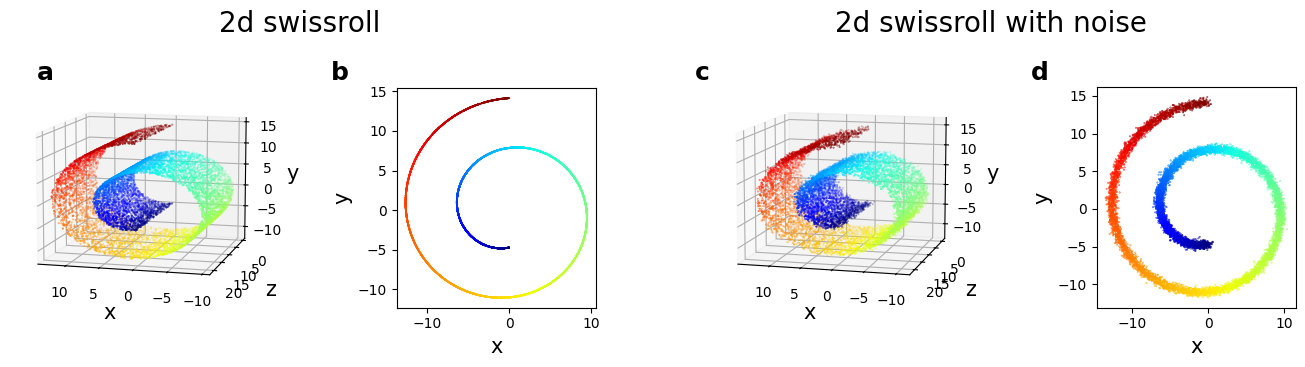

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

n_samples = 10000
std_noise = 0.3
X, t = make_swiss_roll(n_samples, noise=0.0)
X_noisy, t_noisy = make_swiss_roll(n_samples, noise=std_noise)


fig = plt.figure(figsize=(14, 4))

gs = GridSpec(1, 1)
ax = fig.add_subplot(gs[0], projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=0.1, c=t, cmap="jet")
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("z", fontsize=15)
ax.set_zlabel("y", fontsize=15)
ax.view_init(10, 105)
gs.tight_layout(fig, rect=[0.0, 0.0, 0.21, 1])

gs = GridSpec(1, 1)
ax = fig.add_subplot(gs[0])
ax.scatter(-X[:, 0], X[:, 2], s=0.1, c=t, cmap="jet")
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("y", fontsize=15)
gs.tight_layout(fig, rect=[0.23, 0.05, 0.44, 0.8])


gs = GridSpec(1, 1)
ax = fig.add_subplot(gs[0], projection="3d")
ax.scatter(X_noisy[:, 0], X_noisy[:, 1], X_noisy[:, 2], s=0.1, c=t_noisy, cmap="jet")
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("z", fontsize=15)
ax.set_zlabel("y", fontsize=15)
ax.view_init(10, 105)
gs.tight_layout(fig, rect=[0.5, 0.0, 0.71, 1.0])

gs = GridSpec(1, 1)
ax = fig.add_subplot(gs[0])
ax.scatter(-X_noisy[:, 0], X_noisy[:, 2], s=0.1, c=t_noisy, cmap="jet")
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("y", fontsize=15)
gs.tight_layout(fig, rect=[0.73, 0.05, 0.94, 0.8])

fig.text(0.16, 0.9, "2d swissroll", fontsize=20)
fig.text(0.6, 0.9, "2d swissroll with noise", fontsize=20)

fig.text(0.03, 0.78, "a", fontsize=18, weight="bold")
fig.text(0.24, 0.78, "b", fontsize=18, weight="bold")
fig.text(0.5, 0.78, "c", fontsize=18, weight="bold")
fig.text(0.74, 0.78, "d", fontsize=18, weight="bold")from dadapy import data

# initialise the Data class
_data = data.Data(X)
# estimate ID
id_twoNN, _, r = _data.compute_id_2NN()


# initialise the Data class noisy dataset
_data = data.Data(X_noisy)
# estimate ID
id_twoNN_noisy, _, r_noisy = _data.compute_id_2NN()

#
# _data = data.Data(X_plane)
# id_gride, _, r_gride = _data.return_id_scaling_gride(range_max = 5000)
# id_decimation, err, r_decimation = _data.return_id_scaling_2NN(N_min= 20)

In [8]:
from dadapy import data

# initialise the Data class
_data = data.Data(X)
# estimate ID
id_twoNN, _, r = _data.compute_id_2NN()


# initialise the Data class noisy dataset
_data = data.Data(X_noisy)
# estimate ID
id_twoNN_noisy, _, r_noisy = _data.compute_id_2NN()

#
# _data = data.Data(X_plane)
# id_gride, _, r_gride = _data.return_id_scaling_gride(range_max = 5000)
# id_decimation, err, r_decimation = _data.return_id_scaling_2NN(N_min= 20)

In [9]:
print(f"ID = {id_twoNN}; r = {r}".format(id_twoNN, r))
print(
    f"ID_noisy = {id_twoNN_noisy}; r_noisy = {r_noisy}; ".format(
        id_twoNN_noisy, r_noisy
    )
)

ID = 1.999151954130618; r = 0.27020694644232646
ID_noisy = 2.931524503735643; r_noisy = 0.3993130328869166; 
